In [37]:
# 统计词频
def statis(src, words):
    with open(src, 'r', encoding='utf-8') as f:
        for line in f:
            for word in line.lower().split():
                words[word] = words.get(word, 0) + 1
    return words
words = dict()
words = statis('../input/train_data_bpe.csv', words)
words = statis('../input/test_data_bpe.csv', words)
with open('../input/word_freq_bpe.csv', 'w', encoding='utf-8') as fw:
    for k,v in sorted(words.items(), key=lambda x:(x[1], len(x[0])), reverse=True):
        fw.write('{} {}\n'.format(k, v))

In [137]:
import pandas as pd

df = pd.read_csv('../input/train.csv')
print(df.describe())
print(len(df))
df.drop_duplicates(['comment_text','toxic','severe_toxic','obscene','threat','insult','identity_hate'])
print(len(df))

               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000  
159571
159571


312405
4.91891615051
3.7140414666


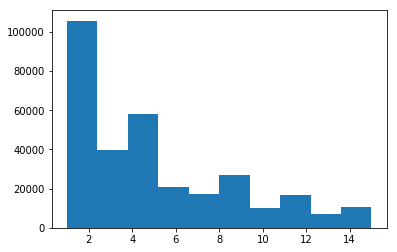

In [39]:
import re,os
import numpy as np
import pylab as pl
# 统计句子数分布
os.system('rm ../input/long.csv')
def statis(src, sents):
    with open(src, 'r', encoding='utf-8') as f, open('../input/long.csv', 'a', encoding='utf-8') as fw:
        for num, line in enumerate(f):
            leng = len(re.split('[,.?!]', line))
            if leng<=15:
                sents.append(leng)
            else:
                leng = len(re.split('[.?!]', line))
                if leng<=15:
                    sents.append(leng)
                else:
                    leng = len(re.split('[?!]', line))
                    if leng<=15:
                        sents.append(leng)
                    else:
                        fw.write(line.strip()+'\n')
    return sents
sents = []
sents = statis('../input/train_data_bpe.csv', sents)
sents = statis('../input/test_data_bpe.csv', sents)
s = np.asarray(sents)
print(len(s))
print(np.mean(s))
print(np.std(s))
pl.hist(s)
pl.show()

In [13]:
# 查看数据
train_data = '../input/train_data.csv'
train_label = '../input/train_label.csv'
def f(fname):
    with open(fname, 'r', encoding='utf-8') as f:
        res = []
        for line in f:
            res.append(line.strip())
        return res
datas = f(train_data)
labels = f(train_label)
labels = [t.split(',')[1:] for t in labels]

tmp = '../input/tmp.csv'
def ff(datas, labels, yes, no, tofile):
    with open(tmp, 'w', encoding='utf-8') as fw:
        for d, label in zip(datas, labels): 
            if label[yes]=='1' and label[no]=='0':
                fw.write(d+'\n')
ff(datas, labels, 5, 0, tmp)
                    

In [145]:
# 得到脏字表
import re
def f(fname):
    res = []
    with open(fname, 'r', encoding='utf-8') as file:
        for line in file:
              res.append(line.strip().lower())  
    return res
base_dir = '../outdata/dict/'
res = set()
t = f(base_dir + 'badwords.txt')
for tt in t:
    for ss in tt.split(','):
        res.add(ss.strip())
t = f(base_dir + 'full-list-of-bad-words-banned-by-google-txt-file_2013_11_26_04_53_31_867.txt')
for tt in t:
    res.add(tt.replace('牋?', ''))
t = f(base_dir + 'google_twunter_lol')
res.update(t)
t = f(base_dir + 'swearWords.txt')
res.update(t)
t = f(base_dir+'Terms-to-Block.csv')
for tt in t:
    res.add(tt.replace(',"', ''))

res2 = set()
for t in res:
    res2.add(t)
    if len(t.replace(' ',''))>=3:
        res2.add(t.replace(' ',''))
    if len(re.sub(r'([^a-zA-Z])\1*', r'', line))>=3:
        res2.add(re.sub(r'([^a-zA-Z])\1*', r'', t))
res = res2
res = list(res)
res.sort()

with open('../input/badword.txt', 'w', encoding='utf-8') as fw:
    for w in res:
        if len(w)>=3:
            fw.write(w+'\n')

In [102]:
import pandas as pd
import csv,re

'''
外部数据
'''

# 比赛主办方官方数据1
datas=pd.read_csv('../outdata/4054689/attack_annotated_comments.tsv', sep = '\t')
datas = datas.loc[:,['rev_id','comment']]
labels = pd.read_csv('../outdata/4054689/attack_annotations.tsv', sep = '\t')
labels = labels.loc[:,['rev_id','attack']]
labels = labels.groupby(['rev_id']).mean().reset_index()
mdatas = pd.merge(datas, labels, on=['rev_id'])
mdatas.rename(columns={'attack':'insult'}, inplace = True)
res = mdatas

datas=pd.read_csv('../outdata/4563973/toxicity_annotated_comments.tsv', sep = '\t')
datas = datas.loc[:,['rev_id','comment']]
labels = pd.read_csv('../outdata/4563973/toxicity_annotations.tsv', sep = '\t')
labels = labels.loc[:,['rev_id','toxicity']]
labels = labels.groupby(['rev_id']).mean().reset_index()
mdatas = pd.merge(datas, labels, on=['rev_id'])
mdatas.rename(columns={'toxicity':'insult'}, inplace = True)
res = pd.concat([res, mdatas])
res['comment']=res['comment'].apply(lambda x:x.replace('NEWLINE_TOKEN',' ').replace('TAB_TOKEN', ' '))
del res['rev_id']
print(len(res))

#kaggle insult
datas=pd.read_csv('../outdata/kaglge insult/impermium_verification_labels.csv', sep = ',')
datas = datas.loc[:,['Insult','Comment']]
datas.rename(columns={'Insult':'insult', 'Comment':'comment'}, inplace = True)
res = pd.concat([res, datas])

datas=pd.read_csv('../outdata/kaglge insult/test_with_solutions.csv', sep = ',')
datas = datas.loc[:,['Insult','Comment']]
datas.rename(columns={'Insult':'insult', 'Comment':'comment'}, inplace = True)
res = pd.concat([res, datas])

datas=pd.read_csv('../outdata/kaglge insult/train.csv', sep = ',')
datas = datas.loc[:,['Insult','Comment']]
datas.rename(columns={'Insult':'insult', 'Comment':'comment'}, inplace = True)
res = pd.concat([res, datas])
res['comment']=res['comment'].apply(lambda x:x.replace("\\n"," ").replace("\\t"," ").replace("\\xa0"," ").replace("\\xc2"," ")
                                   .replace('\n', ' ').replace('\\x80', ' ').replace('\\xe2',' ').replace('\xa0',' ').replace('\ ',' ')
                                   .replace('==',' ').strip().lower())
res['comment']=res['comment'].apply(lambda x:re.sub('\\s+',' ',x))
res['comment']=res['comment'].fillna('unknown', inplace=True)
print(len(res))
res = res.groupby(['comment']).mean().reset_index()
print(len(res))
# rate = (0.932335,0.174051,0.781389,0.038974, 1.0,0.147264)
rate = (0,0,0,0,1,0)
res = res[res['insult']>=0.5]
res['insult'] = res['insult'].apply(lambda x:','.join([str(int(x*t*100)/100) for t in rate]))
res['insult'].to_frame().to_csv('../input/outdata_label.csv', header=False, index=False, encoding='utf-8', quotechar=' ')
res['comment'].to_frame().to_csv('../input/outdata_oneline.csv', header=False, index=False, encoding='utf-8')

275550
284379
204080


In [42]:
import pandas as pd

df = pd.read_csv('../input/train.csv')
#df=df.loc[df["insult"] == 1]
print(df.describe())

               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000  


In [109]:
train=set()
with open('../input/train_data.csv','r',encoding='utf-8') as f:
    for line in f:
        train.add(line.strip())
outdatas = []
outdatas_bpe = []
outdatas_labels = []
with  open('../input/outdata_data.csv', 'r', encoding='utf-8') as datas,\
        open('../input/outdata_data_bpe.csv','r',encoding='utf-8') as datas_bpe,\
        open('../input/outdata_label.csv','r',encoding='utf-8') as labels:
    for data,data_bpe,label in zip(datas, datas_bpe,labels):
        data = data.strip()
        data_bpe = data_bpe.strip()
        label = label.strip()
        if data!='unknown' and data not in train:
            outdatas.append(data)
            outdatas_bpe.append(data_bpe)
            outdatas_labels.append(label)
with  open('../input/outdata_data2.csv', 'w', encoding='utf-8') as datas, \
        open('../input/outdata_data_bpe2.csv','w',encoding='utf-8') as datas_bpe, \
        open('../input/outdata_label2.csv','w',encoding='utf-8') as labels:
    for data,data_bpe,label in zip(outdatas, outdatas_bpe, outdatas_labels):
        datas.write(data+'\n')
        datas_bpe.write(data_bpe+'\n')
        labels.write(label+'\n')

In [154]:

with  open('../input2/test_data_bpe.csv', 'r', encoding='utf-8') as f,\
        open('C:\\Users\\zgy\\Desktop\\RNN_ensemble_src.csv', 'r', encoding='utf-8') as f2,\
        open('C:\\Users\\zgy\\Desktop\\RNN_ensemble_dst.csv', 'r', encoding='utf-8') as f3,\
        open('C:\\Users\\zgy\\Desktop\\RNN_ensemble.csv', 'w', encoding='utf-8') as fw:
    res = []
    fw.write(f2.readline())
    f3.readline()
    for num, (line, line2, line3) in enumerate(zip(f,f2, f3)):
        line = line.strip()
        line2 = line2
        line3 = line3
        if line=='unknown':
            fw.write(line3)
        else:
            fw.write(line2)
#         if (line==''  or line=='unknown':
#             res.append(line2)
#     print('数目：'+str(len(res)))
#     for t in res:
#         print(t.strip())

In [136]:
#测试10fold数据
import pandas as pd
for i in range(1, 11):
    with open('../tenfold/train_data_train_{}.csv'.format(i), 'r', encoding='utf-8') as f1,\
            open('../tenfold/train_data_test_{}.csv'.format(i), 'r', encoding='utf-8') as f2:
        train = set()
        for line in f1:
            train.add(line.strip())
#         print('trian lenght:'+str(len(train)))
        num = 0
        for line in f2:
            
            if line.strip() in train:
                num+=1
        print(num)
        

163
181
172
152
197
176
179
175
190
175


In [141]:
with open('../input/train_data.csv', 'r', encoding='utf-8') as f1, open('../input/train_label.csv', 'r', encoding='utf-8') as f2,\
        open('../input/train_oneline.csv', 'r', encoding='utf-8') as f3:
    a = {}
    num=0
    for ll,(line,label, line2)  in enumerate(zip(f1,f2,f3)):
        line = line.strip()
        label = ','.join(label.strip().split(',')[1:])
        line2 = line2.strip()
        key = line+label
        if line+label not in a:
            a[key]=line2
        else:
#             print('{}-{}'.format(a[line+label],ll))
            print(line2)
            print(a[key]+'\n')


"31, 19 July 2006 (UTC)"
"28, 4 July 2013 (UTC)"

"""Please stop adding nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you.   '096''' """
"Please stop adding nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you.  2000"

""" Please stop. If you continue to vandalize Wikipedia, you will be blocked from editing.   » talk  """
""" Please stop. If you continue to vandalize Wikipedia, you will be blocked from editing.   talk  """

193.61.111.53  15:00
19931994199519961997199819992000200120022003

"""  — Preceding unsigned comment added by  (talk • contribs)  """
"""— Preceding unsigned comment added by  (talk • contribs) """

"03:25, 25 August 2014"
"05 /8: – 08:17, 12 August"

6 July 2005 18:47 (UTC)
7 July 2005 21:06 (UTC)

17:41 10 August 2007.
"05 /8: – 08:17, 12 August"

"19:51, 22 Jun 2005 (UTC)"
"23:34, 22 Jun 2005 (UTC)"

A friendly message to Angela. If you haven't c

In [169]:
# 按类别划分
rate = (0.932335,0.174051,0.781389,0.038974, 1.0,0.147264)
cla=['toxic', 'severe_toxic','obscene','threat','insult','identity_hate']
import pandas as pd
df = pd.read_csv('../input/train_label.csv', header=None, names=['id']+cla)
data = pd.read_csv('../input/train_data_bpe.csv', header=None, names=['comment'], sep='"')
df['comment']=data['comment']
df[df['threat']==1].to_csv('../input/class/thread.csv', header=False, index=False, encoding='utf-8')
df = df[df['threat']==0]
df[df['identity_hate']==1].to_csv('../input/class/identity_hate.csv', header=False, index=False, encoding='utf-8')
df = df[df['identity_hate']==0]
df[df['severe_toxic']==1].to_csv('../input/class/severe_toxic.csv', header=False, index=False, encoding='utf-8')
df = df[df['severe_toxic']==0]
df[df['insult']==1].to_csv('../input/class/insult.csv', header=False, index=False, encoding='utf-8')
df = df[df['insult']==0]
df[df['obscene']==1].to_csv('../input/class/obscene.csv', header=False, index=False, encoding='utf-8')
df = df[df['obscene']==0]
df[df['toxic']==1].to_csv('../input/class/toxic.csv', header=False, index=False, encoding='utf-8')
df = df[df['toxic']==0]
df.to_csv('../input/class/good.csv', header=False, index=False, encoding='utf-8')